In [331]:
# Common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing Algorithims 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Libraries for Hyper-parameter tining
from sklearn.model_selection import ShuffleSplit , cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Libraries for Comparision
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.metrics import mean_absolute_error

# For font and style
%matplotlib inline 
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.6f}'.format)

# For warnings
import warnings 
warnings.filterwarnings('ignore')

## Importing the Data

In [224]:
df = pd.read_csv('chicago-energy-benchmarking-1.csv')
df.head()

,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location
0,2014,157767,Roosevelt Hi-CPS,3436 W WILSON AVE,60625,ALBANY PARK,K-12 School,319900.000000,1927.000000,1,71.000000,6889272.000000,18731796.000000,NaN,NaN,NaN,80.000000,129.000000,75.000000,122.000000,2379.000000,7.440000,41.965013,-87.714513,"(41.96501325, -87.71451268)"
1,2014,100256,Curie Metrop-CPS,4975 S Archer,60632,ARCHER HEIGHTS,K-12 School,447330.000000,1990.000000,1,19.000000,35792767.000000,7180231.000000,NaN,NaN,NaN,96.000000,268.000000,93.000000,261.000000,7573.000000,16.930000,41.802759,-87.722671,"(41.802759, -87.722671)"
2,2014,101551,METROPOLITIAN PIER AND EXPOSITION AUTHORITY,301 Cermak Road,60616,ARMOUR SQUARE,Convention Center,9245333.000000,1971.000000,8,NaN,485542954.000000,344178866.000000,NaN,NaN,NaN,90.000000,204.000000,86.000000,200.000000,115833.000000,12.530000,41.852840,-87.634931,"(41.85284, -87.634931)"
3,2014,100396,St. Rita of Cascia High School,7740 South Western Avenue,60620,ASHBURN,K-12 School,250000.000000,1960.000000,1,68.000000,6027551.000000,15042857.000000,NaN,NaN,NaN,84.000000,139.000000,80.000000,135.000000,2010.000000,8.040000,41.752003,-87.684637,"(41.7520028, -87.68463714)"
4,2014,250052,Steinmetz Ac-CPS,3030 N MOBILE AVE,60634,BELMONT CRAGIN,K-12 School,323400.000000,1934.000000,1,66.000000,8184634.000000,19187703.000000,NaN,NaN,NaN,85.000000,142.000000,80.000000,136.000000,2664.000000,8.240000,41.935603,-87.784340,"(41.93560335, -87.7843396)"


## Data Preprocessing

In [225]:
df.columns

Index(['Data Year', 'ID', 'Property Name', 'Address', 'ZIP Code',
       'Community Area', 'Primary Property Type',
       'Gross Floor Area - Buildings (sq ft)', 'Year Built', '# of Buildings',
       'ENERGY STAR Score', 'Electricity Use (kBtu)', 'Natural Gas Use (kBtu)',
       'District Steam Use (kBtu)', 'District Chilled Water Use (kBtu)',
       'All Other Fuel Use (kBtu)', 'Site EUI (kBtu/sq ft)',
       'Source EUI (kBtu/sq ft)', 'Weather Normalized Site EUI (kBtu/sq ft)',
       'Weather Normalized Source EUI (kBtu/sq ft)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'GHG Intensity (kg CO2e/sq ft)', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [226]:
df = df[['Community Area','Electricity Use (kBtu)','Gross Floor Area - Buildings (sq ft)',
         'Weather Normalized Source EUI (kBtu/sq ft)','# of Buildings']]
df.head()

,Community Area,Electricity Use (kBtu),Gross Floor Area - Buildings (sq ft),Weather Normalized Source EUI (kBtu/sq ft),# of Buildings
0,ALBANY PARK,6889272.000000,319900.000000,122.000000,1
1,ARCHER HEIGHTS,35792767.000000,447330.000000,261.000000,1
2,ARMOUR SQUARE,485542954.000000,9245333.000000,200.000000,8
3,ASHBURN,6027551.000000,250000.000000,135.000000,1
4,BELMONT CRAGIN,8184634.000000,323400.000000,136.000000,1


In [227]:
df.columns = ['Area','Electricity_used','Sq_ft','Weather','Buildings']
df.head()

,Area,Electricity_used,Sq_ft,Weather,Buildings
0,ALBANY PARK,6889272.000000,319900.000000,122.000000,1
1,ARCHER HEIGHTS,35792767.000000,447330.000000,261.000000,1
2,ARMOUR SQUARE,485542954.000000,9245333.000000,200.000000,8
3,ASHBURN,6027551.000000,250000.000000,135.000000,1
4,BELMONT CRAGIN,8184634.000000,323400.000000,136.000000,1


In [229]:
df['Area'] = df['Area'].str.lower()

In [230]:
df = df[['Area','Sq_ft','Weather','Buildings','Electricity_used']]
df.head()

,Area,Sq_ft,Weather,Buildings,Electricity_used
0,albany park,319900.000000,122.000000,1,6889272.000000
1,archer heights,447330.000000,261.000000,1,35792767.000000
2,armour square,9245333.000000,200.000000,8,485542954.000000
3,ashburn,250000.000000,135.000000,1,6027551.000000
4,belmont cragin,323400.000000,136.000000,1,8184634.000000


In [231]:
df.shape

(4481, 5)

In [232]:
df.isna().sum()

Area                 0
Sq_ft                0
Weather             89
Buildings            0
Electricity_used    26
dtype: int64

In [233]:
df.dropna(subset=['Electricity_used'],inplace=True)

In [234]:
mean_weather = df['Weather'].mean()

In [235]:
round(mean_weather,2)

202.83

In [236]:
df['Weather'] = df['Weather'].fillna(mean_weather)

In [237]:
df.isna().sum()

Area                0
Sq_ft               0
Weather             0
Buildings           0
Electricity_used    0
dtype: int64

In [238]:
df.shape

(4455, 5)

In [239]:
df.describe()

,Sq_ft,Weather,Buildings,Electricity_used
count,4455.000000,4455.000000,4455.000000,4455.000000
mean,312960.024198,202.831798,1.501010,15129389.743524
std,497043.905367,269.373993,5.853390,32241810.025687
min,44575.000000,9.000000,1.000000,214.000000
25%,80028.000000,125.400000,1.000000,2362654.800000
50%,146501.000000,163.200000,1.000000,5494589.300000
75%,345406.000000,215.400000,1.000000,13108450.000000
max,9245333.000000,8550.400000,236.000000,495368832.000000


In [240]:
df[df['Sq_ft'] == 9245333.000000]

,Area,Sq_ft,Weather,Buildings,Electricity_used
2,armour square,9245333.000000,200.000000,8,485542954.000000
1764,armour square,9245333.000000,195.600000,8,469870273.000000
1824,armour square,9245333.000000,205.800000,8,485705024.000000


In [241]:
df.head()

,Area,Sq_ft,Weather,Buildings,Electricity_used
0,albany park,319900.000000,122.000000,1,6889272.000000
1,archer heights,447330.000000,261.000000,1,35792767.000000
2,armour square,9245333.000000,200.000000,8,485542954.000000
3,ashburn,250000.000000,135.000000,1,6027551.000000
4,belmont cragin,323400.000000,136.000000,1,8184634.000000


In [242]:
df.corr()

,Sq_ft,Weather,Buildings,Electricity_used
Sq_ft,1.000000,0.010543,0.156774,0.891359
Weather,0.010543,1.000000,0.001882,0.108579
Buildings,0.156774,0.001882,1.000000,0.103789
Electricity_used,0.891359,0.108579,0.103789,1.000000


## Regression plot

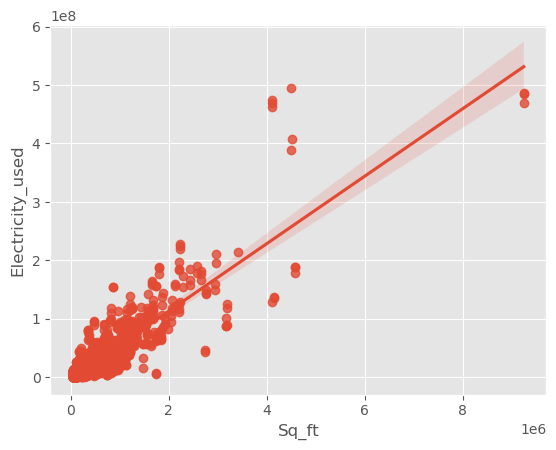

In [243]:
sns.regplot(x = 'Sq_ft', y = 'Electricity_used', data = df)
plt.show()

### One-Hot-Encoding

In [245]:
dummies = pd.get_dummies(df['Area'],drop_first=True)
dummies.head()

,archer heights,armour square,ashburn,auburn gresham,austin,avalon park,avondale,belmont cragin,beverly,bridgeport,brighton park,burnside,calumet heights,chatham,chicago lawn,clearing,douglas,dunning,east garfield park,east side,edgewater,edison park,englewood,forest glen,fuller park,gage park,garfield ridge,grand boulevard,greater grand crossing,hegewisch,hermosa,humboldt park,hyde park,irving park,jefferson park,kenwood,lake view,lincoln park,lincoln square,logan square,loop,lower west side,mckinley park,montclare,morgan park,mount greenwood,near north side,near south side,near west side,new city,north center,north lawndale,north park,norwood park,oakland,ohare,portage park,pullman,riverdale,rogers park,roseland,south chicago,south deering,south lawndale,south shore,uptown,washington heights,washington park,west elsdon,west englewood,west garfield park,west lawn,west pullman,west ridge,west town,woodlawn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [246]:
dummies.shape

(4455, 76)

In [247]:
df1 = pd.concat([df,dummies], axis = 'columns')
df1.head()

,Area,Sq_ft,Weather,Buildings,Electricity_used,archer heights,armour square,ashburn,auburn gresham,austin,avalon park,avondale,belmont cragin,beverly,bridgeport,brighton park,burnside,calumet heights,chatham,chicago lawn,clearing,douglas,dunning,east garfield park,east side,edgewater,edison park,englewood,forest glen,fuller park,gage park,garfield ridge,grand boulevard,greater grand crossing,hegewisch,hermosa,humboldt park,hyde park,irving park,jefferson park,kenwood,lake view,lincoln park,lincoln square,logan square,loop,lower west side,mckinley park,montclare,morgan park,mount greenwood,near north side,near south side,near west side,new city,north center,north lawndale,north park,norwood park,oakland,ohare,portage park,pullman,riverdale,rogers park,roseland,south chicago,south deering,south lawndale,south shore,uptown,washington heights,washington park,west elsdon,west englewood,west garfield park,west lawn,west pullman,west ridge,west town,woodlawn
0,albany park,319900.000000,122.000000,1,6889272.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,archer heights,447330.000000,261.000000,1,35792767.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,armour square,9245333.000000,200.000000,8,485542954.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ashburn,250000.000000,135.000000,1,6027551.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,belmont cragin,323400.000000,136.000000,1,8184634.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [248]:
df1.drop(['Area'], axis = 'columns', inplace = True)
df1.head()

,Sq_ft,Weather,Buildings,Electricity_used,archer heights,armour square,ashburn,auburn gresham,austin,avalon park,avondale,belmont cragin,beverly,bridgeport,brighton park,burnside,calumet heights,chatham,chicago lawn,clearing,douglas,dunning,east garfield park,east side,edgewater,edison park,englewood,forest glen,fuller park,gage park,garfield ridge,grand boulevard,greater grand crossing,hegewisch,hermosa,humboldt park,hyde park,irving park,jefferson park,kenwood,lake view,lincoln park,lincoln square,logan square,loop,lower west side,mckinley park,montclare,morgan park,mount greenwood,near north side,near south side,near west side,new city,north center,north lawndale,north park,norwood park,oakland,ohare,portage park,pullman,riverdale,rogers park,roseland,south chicago,south deering,south lawndale,south shore,uptown,washington heights,washington park,west elsdon,west englewood,west garfield park,west lawn,west pullman,west ridge,west town,woodlawn
0,319900.000000,122.000000,1,6889272.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,447330.000000,261.000000,1,35792767.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9245333.000000,200.000000,8,485542954.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,250000.000000,135.000000,1,6027551.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,323400.000000,136.000000,1,8184634.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Scaling the Data

In [249]:
scaler = StandardScaler()
scaler.fit(df1[['Sq_ft','Weather','Buildings']])

StandardScaler()

In [250]:
scaled = scaler.transform(df1[['Sq_ft','Weather','Buildings']])
scaled

array([[ 1.39640679e-02, -3.00106447e-01, -8.56027545e-02],
       [ 2.70368589e-01,  2.15962686e-01, -8.56027545e-02],
       [ 1.79730112e+01, -1.05136964e-02,  1.11041960e+00],
       ...,
       [-4.79820374e-01,  1.37916023e+00, -8.56027545e-02],
       [-2.82807615e-01,  3.60902441e+00, -8.56027545e-02],
       [-3.48016418e-01, -5.20962452e-02, -8.56027545e-02]])

In [251]:
scaled[:,0]

array([ 1.39640679e-02,  2.70368589e-01,  1.79730112e+01, ...,
       -4.79820374e-01, -2.82807615e-01, -3.48016418e-01])

In [252]:
df1['Sq_ft'] = scaled[:,0]
df1['Weather'] = scaled[:,1]
df1['Buildings'] = scaled[:,2]

In [253]:
df1.head()

,Sq_ft,Weather,Buildings,Electricity_used,archer heights,armour square,ashburn,auburn gresham,austin,avalon park,avondale,belmont cragin,beverly,bridgeport,brighton park,burnside,calumet heights,chatham,chicago lawn,clearing,douglas,dunning,east garfield park,east side,edgewater,edison park,englewood,forest glen,fuller park,gage park,garfield ridge,grand boulevard,greater grand crossing,hegewisch,hermosa,humboldt park,hyde park,irving park,jefferson park,kenwood,lake view,lincoln park,lincoln square,logan square,loop,lower west side,mckinley park,montclare,morgan park,mount greenwood,near north side,near south side,near west side,new city,north center,north lawndale,north park,norwood park,oakland,ohare,portage park,pullman,riverdale,rogers park,roseland,south chicago,south deering,south lawndale,south shore,uptown,washington heights,washington park,west elsdon,west englewood,west garfield park,west lawn,west pullman,west ridge,west town,woodlawn
0,0.013964,-0.300106,-0.085603,6889272.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.270369,0.215963,-0.085603,35792767.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,17.973011,-0.010514,1.110420,485542954.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-0.126683,-0.251841,-0.085603,6027551.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.021006,-0.248128,-0.085603,8184634.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [254]:
df1.isna().sum()

Sq_ft               0
Weather             0
Buildings           0
Electricity_used    0
archer heights      0
                   ..
west lawn           0
west pullman        0
west ridge          0
west town           0
woodlawn            0
Length: 80, dtype: int64

## Splitting the Data

In [255]:
X = df1.drop(['Electricity_used'], axis = 1)
y = df1['Electricity_used']

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

3564
891
3564
891


In [258]:
X_train.head()

,Sq_ft,Weather,Buildings,archer heights,armour square,ashburn,auburn gresham,austin,avalon park,avondale,belmont cragin,beverly,bridgeport,brighton park,burnside,calumet heights,chatham,chicago lawn,clearing,douglas,dunning,east garfield park,east side,edgewater,edison park,englewood,forest glen,fuller park,gage park,garfield ridge,grand boulevard,greater grand crossing,hegewisch,hermosa,humboldt park,hyde park,irving park,jefferson park,kenwood,lake view,lincoln park,lincoln square,logan square,loop,lower west side,mckinley park,montclare,morgan park,mount greenwood,near north side,near south side,near west side,new city,north center,north lawndale,north park,norwood park,oakland,ohare,portage park,pullman,riverdale,rogers park,roseland,south chicago,south deering,south lawndale,south shore,uptown,washington heights,washington park,west elsdon,west englewood,west garfield park,west lawn,west pullman,west ridge,west town,woodlawn
95,3.076082,-0.192437,-0.085603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3056,-0.514517,1.141546,-0.085603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2792,4.903618,-0.261494,0.426978,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4480,-0.348016,-0.052096,-0.085603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
240,0.379548,-0.285256,1.281280,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Model Building

In [259]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [260]:
lm.score(X_train,y_train)

0.814470604595023

In [261]:
lm.score(X_test,y_test)

0.7861006980805095

In [262]:
pred_lm = lm.predict(X_test)

In [263]:
RMSE = mean_absolute_error(y_test, pred_lm)

In [329]:
RMSE

6340279.919309941

In [265]:
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)
dt.score(X_train,y_train)

0.9999954635065987

In [266]:
dt.score(X_test,y_test)

0.9576490313920689

In [267]:
params = {'max_depth':[None,10,20,30],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,4,5,6,10],
    'max_features':['auto', 'sqrt', 'log2'],
    'min_weight_fraction_leaf':[0.0,0.1,0.001],
    'max_features':[1,2,3,4]}

In [268]:
grid_serch = GridSearchCV(estimator=dt, param_grid=params, cv= 5, scoring='accuracy')

In [269]:
grid_serch.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 4, 5, 6, 10],
                         'min_samples_split': [2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.001]},
             scoring='accuracy')

In [270]:
best_score = grid_serch.best_score_
best_estimate = grid_serch.best_params_

In [271]:
best_estimate

{'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0}

In [272]:
best_score

nan

In [273]:
dt_new = DecisionTreeRegressor(max_depth=None, 
                               max_features='auto', 
                               min_samples_leaf=1, 
                               min_samples_split=2)
dt_new.fit(X_train,y_train)

DecisionTreeRegressor(max_features='auto')

In [274]:
dt_new.score(X_train,y_train)

0.9999954635065987

In [275]:
dt_new.score(X_test,y_test)

0.9574534318457969

In [276]:
pred_dt = dt.predict(X_test)

In [330]:
plot = pd.DataFrame([y_test,pred]).transpose()
plot.columns = ['Actual set','Predicted set']

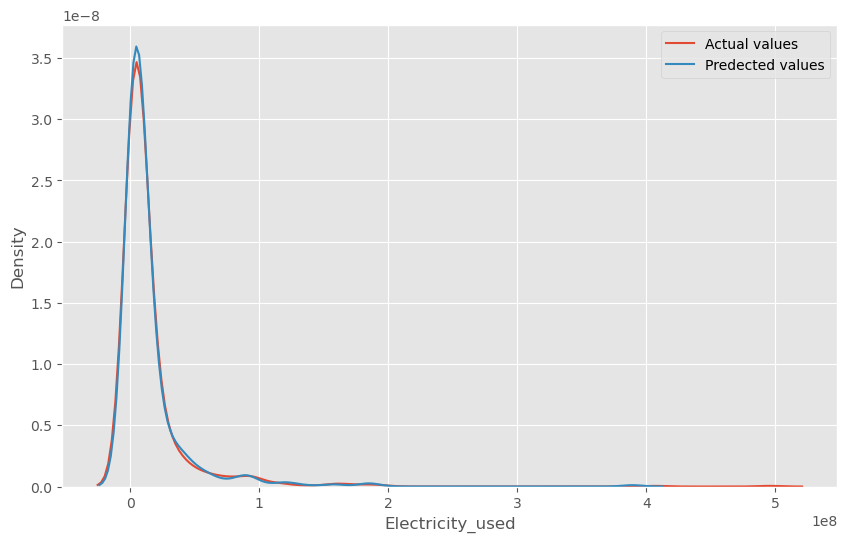

In [281]:
plt.figure(figsize=(10,6))
ax1 = sns.distplot(y_test, hist = False, label='Actual values')
sns.distplot(pred_dt,hist=False, label='Predected values',ax=ax1)
plt.legend()
plt.show()


In [282]:
kfold = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
cv_score = cross_val_score(estimator=dt, X=X, y=y, cv=kfold)
cv_score

array([0.94949191, 0.97444253, 0.9340963 , 0.97818754, 0.95155271])

In [283]:
cv_score.mean()

0.957554199473687

In [284]:
pred_cv = cross_val_predict(estimator=dt,X=X,y=y)

In [286]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_train,y_train)

0.995377095580281

In [287]:
rfr.score(X_test,y_test)

0.9484903240547006

In [288]:
xgb = XGBRegressor(n_estimators = 10000,early_stopping_rounds = 300, learning_rate = 0.1)
xgb.fit(X_train,y_train, eval_set=[(X_train,y_train),(X_test,y_test)], verbose=50)
xgb.score(X_train,y_train)

[0]	validation_0-rmse:32309008.35487	validation_1-rmse:32944628.73419
[50]	validation_0-rmse:2490873.11622	validation_1-rmse:6163707.03801
[100]	validation_0-rmse:2136152.35169	validation_1-rmse:6009951.72665
[150]	validation_0-rmse:1939757.71756	validation_1-rmse:5980185.67329
[200]	validation_0-rmse:1750004.40941	validation_1-rmse:5964387.80217
[250]	validation_0-rmse:1603802.62482	validation_1-rmse:5946041.70357
[300]	validation_0-rmse:1478837.02437	validation_1-rmse:5931852.65534
[350]	validation_0-rmse:1348577.68437	validation_1-rmse:5911545.45176
[400]	validation_0-rmse:1242097.96422	validation_1-rmse:5923005.87799
[450]	validation_0-rmse:1128102.02092	validation_1-rmse:5918660.39838
[500]	validation_0-rmse:1065331.45374	validation_1-rmse:5926608.50180
[550]	validation_0-rmse:1000064.25842	validation_1-rmse:5927473.73529
[600]	validation_0-rmse:922552.00308	validation_1-rmse:5923941.45093
[650]	validation_0-rmse:846094.62219	validation_1-rmse:5926097.78462
[685]	validation_0-rmse

0.9984141579974861

In [289]:
xgb.score(X_test,y_test)

0.9676096591029065

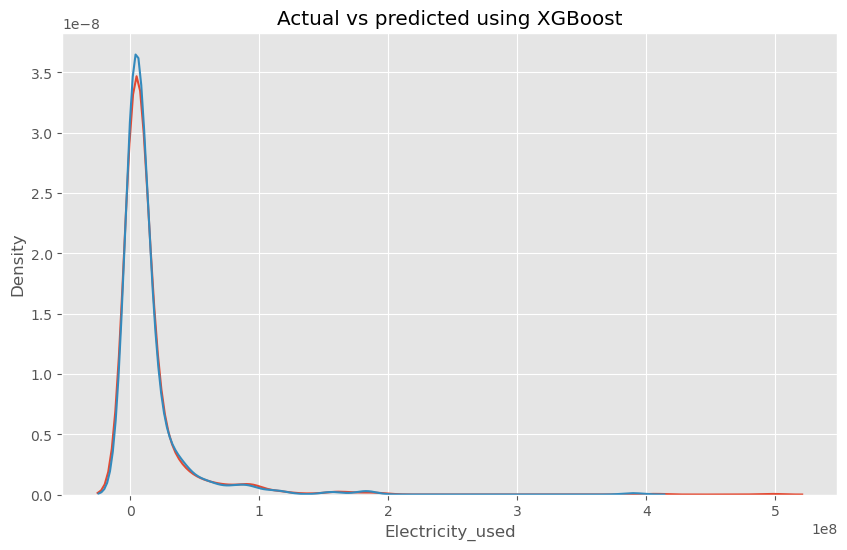

In [290]:
pred_xgb = xgb.predict(X_test)

plt.figure(figsize=(10,6))
ax = sns.distplot(y_test, hist=False, label='Acutal Set')
sns.distplot(pred_xgb, hist=False, label='Predicted Set')
plt.title('Actual vs predicted using XGBoost')
plt.show()

In [291]:
param_xgb = {
    'n_estimators': [1000, 10000, 15000],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4], 
    'min_child_weight': [1, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.01, 0.1], 
    'reg_lambda': [0, 0.01, 0.1],
}

In [292]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid_serch_xgb = RandomizedSearchCV(estimator=XGBRegressor(), 
                                    param_distributions=param_xgb, 
                                    scoring=mse_scorer, 
                                    cv=5, 
                                    verbose=50, 
                                    error_score='raise')

In [293]:
grid_serch_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=0, subsample=0.8
[CV 1/5; 1/10] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=0, subsample=0.8;, score=-31858537572217.789 total time=   1.5s
[CV 2/5; 1/10] START colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=0, subsample=0.8
[CV 2/5; 1/10] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=0, subsample=0.8;, score=-25332451925416.000 total time=   1.5s
[CV 3/5; 1/10] START colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=1000, reg_alpha=0.01, reg_lambda=0, subsample=0.8
[CV 3/5; 

[CV 2/5; 5/10] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=10000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9;, score=-33440501507458.367 total time=  19.1s
[CV 3/5; 5/10] START colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=10000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9
[CV 3/5; 5/10] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=10000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9;, score=-31251327006068.949 total time=  19.1s
[CV 4/5; 5/10] START colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=10000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9
[CV 4/5; 5/10] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=10000, reg_alpha=0.1, reg_lambda=0.01, subsample=0.9;, score=-16960267615775.910 total time=  19.6s
[CV 5/5; 5

[CV 4/5; 9/10] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=0.01, subsample=0.8;, score=-19647250422787.828 total time=   1.9s
[CV 5/5; 9/10] START colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=0.01, subsample=0.8
[CV 5/5; 9/10] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=1000, reg_alpha=0, reg_lambda=0.01, subsample=0.8;, score=-14761619444973.525 total time=   2.1s
[CV 1/5; 10/10] START colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=1000, reg_alpha=0.01, reg_lambda=0, subsample=0.8
[CV 1/5; 10/10] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=1000, reg_alpha=0.01, reg_lambda=0, subsample=0.8;, score=-42636733299884.867 total time=   1.9s
[CV 2/5; 10/10] START cols

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints...
                                          predictor=None, random_state=None, ...),
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1],
                                        'learning_rate': [0.01, 0.1],
                                        'max_depth': [3, 4],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [1000, 10000, 15000],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [0, 0.01, 0.1],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring=make_scorer(mean_squared_error, greater_is_better=False),
                   verbose=50)

In [298]:
grid_serch_xgb.best_params_

{'subsample': 0.8,
 'reg_lambda': 0.1,
 'reg_alpha': 0.01,
 'n_estimators': 10000,
 'min_child_weight': 1,
 'max_depth': 4,
 'learning_rate': 0.01,
 'gamma': 0.1,
 'colsample_bytree': 1.0}

In [299]:
xgb2 = XGBRegressor(subsample = 0.8,
                    reg_lambda = 0.1,
                    reg_alpha = 0.01,
                    n_estimators = 10000,
                    min_child_weight = 3,
                    max_depth = 4,
                    learning_rate = 0.01,
                    gamma = 1,
                    colsample_bytree = 1)
xgb2.fit(X_train,y_train)
print(xgb2.score(X_train, y_train))
print(xgb2.score(X_test,y_test))

0.9984881488972951
0.9690913490925384


In [301]:
models = []
models.append(('Ridge',Ridge(random_state=1)))
models.append(('Lasso',Lasso(random_state=1)))
models.append(('Elastic net',ElasticNet(random_state=1)))

result = []
names = []

for name, model in models:
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    result.append(score)
    print('{}: Train {}, Test {}'.format(name,score,test_score))

Ridge: Train 0.8144463869310101, Test 0.7862273109065395
Lasso: Train 0.8144706044760344, Test 0.7861007595200591
Elastic net: Train 0.7253522201858482, Test 0.6582181475124949


In [305]:
xgb2.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [308]:
df.Area.unique()

array(['albany park', 'archer heights', 'armour square', 'ashburn',
       'belmont cragin', 'brighton park', 'calumet heights', 'chatham',
       'douglas', 'dunning', 'edgewater', 'englewood', 'garfield ridge',
       'grand boulevard', 'hyde park', 'irving park', 'kenwood',
       'lake view', 'lincoln park', 'loop', 'lower west side',
       'morgan park', 'near north side', 'near south side',
       'near west side', 'north center', 'north park', 'norwood park',
       'ohare', 'portage park', 'pullman', 'riverdale', 'roseland',
       'south lawndale', 'uptown', 'washington heights', 'west englewood',
       'west lawn', 'west town', 'austin', 'woodlawn', 'new city',
       'lincoln square', 'west garfield park', 'auburn gresham',
       'washington park', 'beverly', 'gage park', 'rogers park',
       'edison park', 'north lawndale', 'greater grand crossing',
       'bridgeport', 'humboldt park', 'east side', 'logan square',
       'south shore', 'chicago lawn', 'west ridge', 'so

## Predicting for new Data

In [320]:
def predict_price(location,sqft,weather,buildings):
    loc_index = np.where(X.columns == location)[0][0]
    
    y = np.zeros(len(X.columns))
    y[0] = (sqft - df['Sq_ft'].mean()) / df['Sq_ft'].std()
    y[1] = (weather - df['Weather'].mean()) / df['Weather'].std()
    y[2] = (buildings - df['Buildings'].mean()) / df['Buildings'].std()
    if loc_index >= 0:
        y[loc_index] = 1
    df_input = pd.DataFrame(data=y.reshape(1,-1),columns=X.columns)
    
    
    return xgb2.predict(df_input)[0]

In [327]:
df[df['Area'] == 'austin'].head()

,Area,Sq_ft,Weather,Buildings,Electricity_used
245,austin,64955.000000,114.100000,1,56705.000000
333,austin,79775.000000,110.500000,1,1300650.000000
352,austin,85200.000000,123.500000,1,1418738.000000
369,austin,69535.000000,107.900000,1,1466222.000000
374,austin,94900.000000,126.100000,1,1480398.000000


In [325]:
df[df['Area'] == 'englewood'].head()

,Area,Sq_ft,Weather,Buildings,Electricity_used
12,englewood,496817.000000,336.000000,6,38312563.000000
249,englewood,54758.000000,159.300000,1,259902.000000
321,englewood,51900.000000,129.600000,1,1229521.000000
327,englewood,71892.000000,104.300000,1,1249805.000000
344,englewood,68227.000000,119.400000,1,1387486.000000


In [328]:
predict_price('austin',79775,110.1,1)

1435943.6

In [326]:
predict_price('englewood',496817,336,6)

35786412.0